In [1]:
# Project 2 - California Housing Prices

# COE 379L  
# Ayushi Sapru / as98489

In [5]:
# Part 1: Exploratory Data Analysis

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning) 
# ChatGPT helped me write the above line to ignore all warnings. 

In [6]:
# Identify the shape and size of the data. 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("california_housing.csv")

print("Shape of dataset: ", df.shape)
print("Size of dataset: ", df.size)

Shape of dataset:  (20634, 9)
Size of dataset:  185706


In [13]:
# Check if any variables need datatype conversion. 

print("\nData Types: ")
print(df.dtypes)


Data Types: 
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object


In [15]:
# Since price_above_median is measured in USD, we should change its type from int64 to float64 since price values can have decimals.

df["price_above_median"] = df["price_above_median"].astype("float64")

# Now we can check the data types again. 

print("\nData Types: ")
print(df.dtypes)


Data Types: 
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median    float64
dtype: object


In [12]:
# Check for missing values and duplicate rows and treat them if required. 

print("\nMissing Values: ")
print(df.isnull().sum())

duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows: ", duplicate_rows)


Missing Values: 
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

Number of duplicate rows:  0


In [16]:
# There are no missing values or duplicate rows, so we can move on and get statistical info (mean, median, etc.)

print("\nStatistical Summary: ")
print(df.describe())

print("\nAnomalies: ")
for col in df.select_dtypes(include = ['number']).columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")


Statistical Summary: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457        

In [19]:
# Let's derive some insights from the above statistical info. 
# 1. Median Income: The average median income is $3.87k with a range of $0.5 - $15k. This suggests a significant income disparity. 
# 2. House Age: The houses range from 1 to 52 years old, with a median age of 29 years. There is a presence of older houses, while also having newer developmens.
# 3. Average Rooms: The average number of rooms in 5.43, but the maximum is 141.91. This extreme outlier suggests potential outliers - likely an apartment complex.
# 4. Average Bedrooms: The average number of bedrooms is 1.1, but the maximum is 34.07. This also suggest potential outliers. 
# 5. Population: The average population per block is 1425, but the maximum is 35682, which again could show a densely populated block or a data inconsistency.
# 6. Average Occupancy: The average occupancy is 3.07 people, but the maximum is 1243. This could suggest an apartment complex.
# 7. Geography: The latitude and longitude ranges cover areas in California.

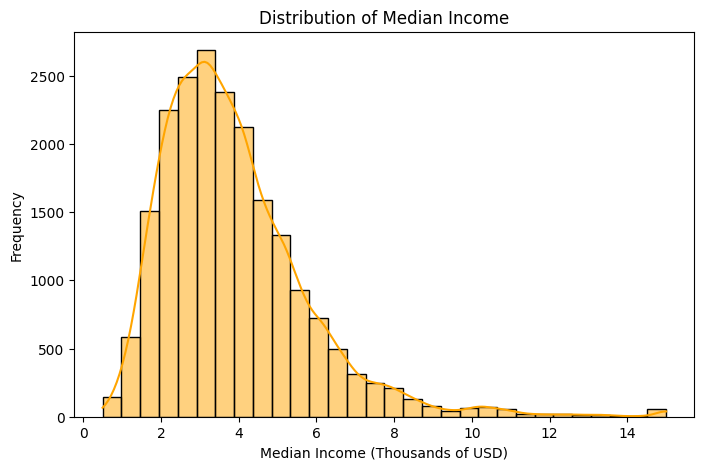

In [32]:
# Let's visualize the dataset through different univariate analyses. 

plt.figure(figsize = (8, 5))
sns.histplot(df["MedInc"], bins = 30, kde = True, color = "orange")
plt.title("Distribution of Median Income")
plt.xlabel("Median Income (Thousands of USD)")
plt.ylabel("Frequency")
plt.show()

In [21]:
# The distribution of median income is right-skewed, meaning most households earn on the lower end. The peak occurs between $2k - $5k, suggesting that most neighborhoods have a median income in this range. The long tail at the right extending beyond $10k indicates a small number of very wealthy areas

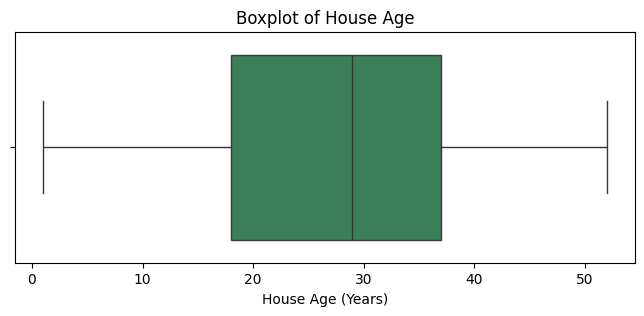

In [26]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df["HouseAge"], color="seagreen")
plt.title("Boxplot of House Age")
plt.xlabel("House Age (Years)")
plt.show()

In [33]:
# The median house age is around 29 years, meaning half of the houses are younger and half are older than 29. As seen in the IQR, most houses fall between 18 - 37. The minimum is 1 year, which shows some very newly built houses in the dataset, and the maximum is 52. There are no apparent outliers, meaning house age is relatively evenly distributed. 

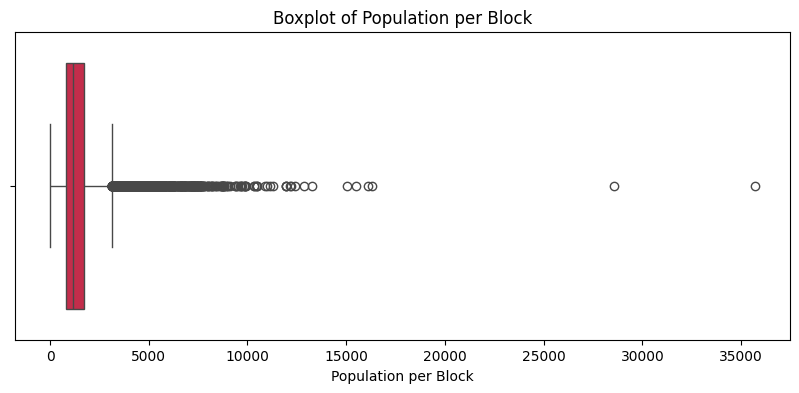

In [38]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = df["Population"], color = "crimson")
plt.title("Boxplot of Population per Block")
plt.xlabel("Population per Block")
plt.show()

In [39]:
# The majority of population values are concentrated between 0 - 3000. There is a large number of extreme outliers greater than 5000. The whiskers are short, which means the IQR is small. These outliers represent very densely populated regions, such as apartment blocks or high-rise neighborhoods.

In [40]:
# Part 2: Classification Techniques

In [43]:
# Split the data into training and test datasets.

from sklearn.model_selection import train_test_split

X = df.drop(columns = ["price_above_median"])
y = df["price_above_median"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

Training Set: 16507 samples
Test Set: 4127 samples


In [50]:
# Perform classification using K-nearnest neighbor, Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier. 
# When appropriate, use a hyperparameter space search to find optimal hyperparameter setting. 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

param_grid_knn = {"n_neighbors": [3, 5, 7, 9]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid_knn, cv = 5, scoring = "accuracy")
knn_grid.fit(X_train_scaled, y_train)

print("Best KNN Params:", knn_grid.best_params_)

Best KNN Params: {'n_neighbors': 9}


In [54]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {"max_depth": [None, 10, 20, 30]}
dt = DecisionTreeClassifier(random_state = 1)
dt_grid = GridSearchCV(dt, param_grid_dt, cv = 5, scoring = "accuracy")
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)

Best Decision Tree Params: {'max_depth': 10}


In [56]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
rf = RandomForestClassifier(random_state = 1)
rf_grid = GridSearchCV(rf, param_grid_rf, cv = 5, scoring = "accuracy")
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)

Best Random Forest Params: {'max_depth': 20, 'n_estimators': 200}


In [58]:
from sklearn.ensemble import AdaBoostClassifier

param_grid_ada = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1.0]}
ada = AdaBoostClassifier(random_state = 1)
ada_grid = GridSearchCV(ada, param_grid_ada, cv = 5, scoring = "accuracy")
ada_grid.fit(X_train, y_train)

print("Best AdaBoost Params:", ada_grid.best_params_)

Best AdaBoost Params: {'learning_rate': 1.0, 'n_estimators': 200}


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_models = {
    "KNN": knn_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "AdaBoost": ada_grid.best_estimator_
}

for name, model in best_models.items():
    X_train_eval = X_train_scaled if name == "KNN" else X_train
    X_test_eval = X_test_scaled if name == "KNN" else X_test

    y_train_pred = model.predict(X_train_eval)
    y_test_pred = model.predict(X_test_eval)

    metrics = {
        "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
        "Precision": (precision_score(y_train, y_train_pred, average = "binary"), precision_score(y_test, y_test_pred, average = "binary")),
        "Recall": (recall_score(y_train, y_train_pred, average = "binary"), recall_score(y_test, y_test_pred, average = "binary")),
        "F1-Score": (f1_score(y_train, y_train_pred, average = "binary"), f1_score(y_test, y_test_pred, average = "binary"))
    }

    print(f"\n {name}Model Performance:")
    for metric, (train_value, test_value) in metrics.items():
        print(f"{metric}: Train = {train_value:.4f}, Test = {test_value:.4f}")


 KNNModel Performance:
Accuracy: Train = 0.8724, Test = 0.8418
Precision: Train = 0.8706, Test = 0.8348
Recall: Train = 0.8748, Test = 0.8522
F1-Score: Train = 0.8727, Test = 0.8434

 Decision TreeModel Performance:
Accuracy: Train = 0.9179, Test = 0.8488
Precision: Train = 0.9143, Test = 0.8403
Recall: Train = 0.9222, Test = 0.8614
F1-Score: Train = 0.9183, Test = 0.8507

 Random ForestModel Performance:
Accuracy: Train = 1.0000, Test = 0.9026
Precision: Train = 1.0000, Test = 0.9003
Recall: Train = 1.0000, Test = 0.9055
F1-Score: Train = 1.0000, Test = 0.9029

 AdaBoostModel Performance:
Accuracy: Train = 0.8867, Test = 0.8830
Precision: Train = 0.8876, Test = 0.8755
Recall: Train = 0.8856, Test = 0.8929
F1-Score: Train = 0.8866, Test = 0.8841


In [62]:
# The Random Forest model achieved the highest test accuracy (90.26%) but showed clear overfitting since it memorized the training data. 
# AdaBoost performed nearly as well (88.30%), but with less overfitting, making it a strong alternative. 
# The Decision Tree model also performed decently (84.88%), but had slightly more overfitting than AdaBoost. 
# KNN had the lowest accuracy (84.18%), likely because it is sensitive to data distribution and was affected by scaling. 
# In terms of precision, recall, and F1-score, Random Forest remained the strongest model, but its overfitting means AdaBoost may be the more reliable choice for real-world applications.
# The best metric to focus on depends on whether false positives (precision) or false negatives (recall) are more critical, but F1-score provides a good balance between the two.


Confusion Matrix for KNN:


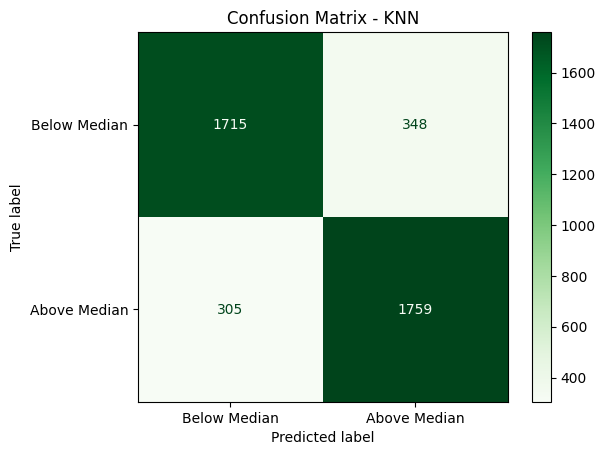


Confusion Matrix for Decision Tree:


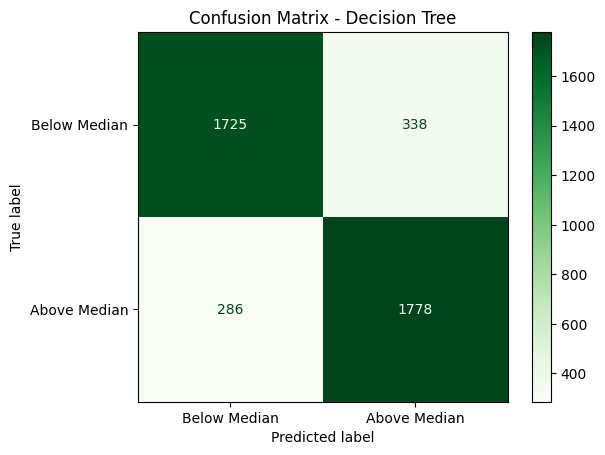


Confusion Matrix for Random Forest:


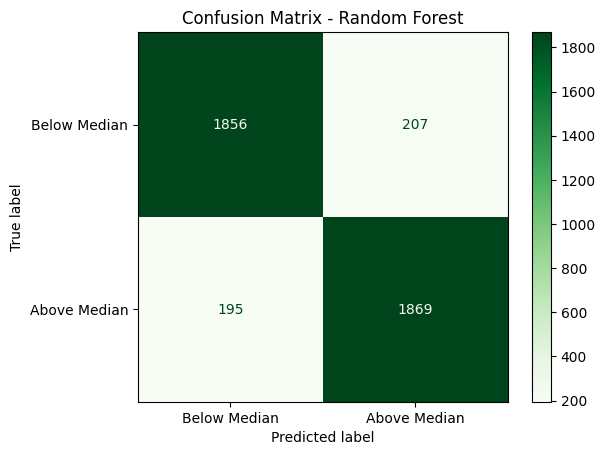


Confusion Matrix for AdaBoost:


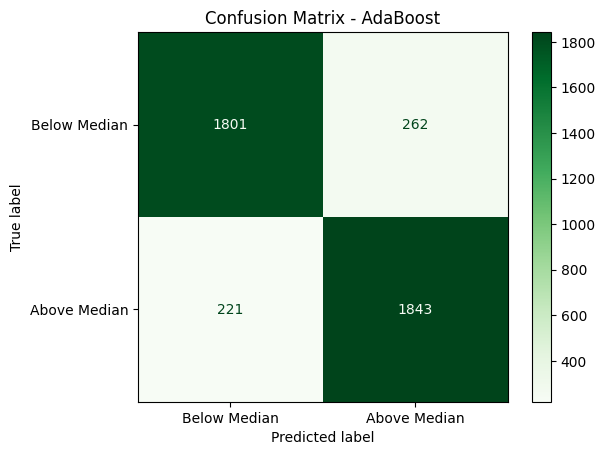

In [69]:
from sklearn.metrics import confusion_matrix

for name, model in best_models.items():
    X_test_eval = X_test_scaled if name == "KNN" else X_test  
    y_pred = model.predict(X_test_eval)  
    print(f"\nConfusion Matrix for {name}:")
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ["Below Median", "Above Median"], cmap = plt.cm.Greens)
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

In [70]:
# The Random Forest model has the lowest misclassifications, showing the best overall performance, but its perfect training accuracy suggests it may be overfitting. 
# AdaBoost performs similarly well, with slightly more balanced predictions and less overfitting. 
# KNN and Decision Tree have more misclassifications, especially in false positives and false negatives, indicating they may struggle more with boundary cases. 
# Overall, Random Forest and AdaBoost are the most reliable models, with AdaBoost being the better choice if overfitting is a concern.